In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# ДЗ 3.1, 3.2,

## 3.1 Автоматическое дифференцирование в `torch`

Автоматическое дифференцирование (automatic differentiation) - это способ вычисления градиентов функции по ее входным параметрам с использованием цепного правила дифференцирования. В глубоком обучении автоматическое дифференцирование используется для вычисления градиентов функции потерь по параметрам модели, чтобы оптимизировать ее на основе данных обучения.

torch предоставляет автоматическое дифференцирование с помощью пакета autograd. Когда мы вызываем метод backward() на тензоре, содержащем результат операции вычисления функции потерь, PyTorch использует автоматическое дифференцирование для вычисления градиентов этого тензора по всем параметрам модели.

PyTorch представляет граф вычислений (computational graph), в котором каждая операция представлена узлом графа, а каждый тензор представлен ребром графа. Граф вычислений хранит историю всех операций, выполняемых с тензорами, включая операции вычисления функции потерь и операции на каждом слое модели. Когда мы вызываем метод backward(), PyTorch автоматически применяет цепное правило дифференцирования для вычисления градиентов функции потерь по всем параметрам модели на основе этого графа вычислений.

Таким образом, автоматическое дифференцирование в torch облегчает процесс обучения моделей глубокого обучения, так как мы можем использовать стандартные оптимизаторы, такие как стохастический градиентный спуск, для обновления параметров модели на основе вычисленных градиентов, без необходимости явно вычислять градиенты вручную.

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [2]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [3]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    self.y_pred = torch.tensor(y_pred, requires_grad=True)
    self.z = (self.y_pred - y_true) ** 2
    return self.z

  def backward(self):
    self.z.backward()
    self.dinput =  self.y_pred.grad

In [4]:
class Neuron:
  def __init__(self, n_inputs):
    self.n_inputs = n_inputs
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)
  
  def forward(self, input):
    self.input = input
    return torch.dot(self.weights, input) + self.bias
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss) - по сути производная ошибки dE
    self.dweights = dvalue * self.input # df/dW
    self.dinput =  dvalue * self.weights # df/wX
    self.dbias = dvalue # df/db

In [5]:
import random

n_inputs = 4 # <размерность элемента выборки >
lr = 0.01 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  for x_example, y_example in random.sample(list(zip(X, y)), 20):
    # forward pass
    y_pred = neuron.forward(x_example) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    loss.backward()
    neuron.backward(loss.dinput)
    # градиентный спуск
    neuron.weights -= lr * neuron.dweights
    neuron.bias -= lr * neuron.dbias
  print(f'epoch {epoch} mean loss {sum(losses) / len(losses)}')
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу

    # <шаг оптимизации для весов (weights и bias) нейрона>

/tmp/ipykernel_4879/1367873144.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)


epoch 0 mean loss tensor([10281.4922], grad_fn=<DivBackward0>)
epoch 1 mean loss tensor([6490.9902], grad_fn=<DivBackward0>)
epoch 2 mean loss tensor([4652.5049], grad_fn=<DivBackward0>)
epoch 3 mean loss tensor([3573.5137], grad_fn=<DivBackward0>)
epoch 4 mean loss tensor([2881.7671], grad_fn=<DivBackward0>)
epoch 5 mean loss tensor([2422.6433], grad_fn=<DivBackward0>)
epoch 6 mean loss tensor([2083.9714], grad_fn=<DivBackward0>)
epoch 7 mean loss tensor([1825.6555], grad_fn=<DivBackward0>)
epoch 8 mean loss tensor([1623.5457], grad_fn=<DivBackward0>)
epoch 9 mean loss tensor([1461.5685], grad_fn=<DivBackward0>)
epoch 10 mean loss tensor([1328.9722], grad_fn=<DivBackward0>)
epoch 11 mean loss tensor([1218.3228], grad_fn=<DivBackward0>)
epoch 12 mean loss tensor([1124.6499], grad_fn=<DivBackward0>)
epoch 13 mean loss tensor([1044.3397], grad_fn=<DivBackward0>)
epoch 14 mean loss tensor([974.7234], grad_fn=<DivBackward0>)
epoch 15 mean loss tensor([913.8073], grad_fn=<DivBackward0>)
epo

3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [34]:
class Linear:
    def __init__(self, input, neurons):
        self.input = input

        self.weights = torch.randn(neurons, input, requires_grad=True)
        self.biases = torch.randn(neurons, requires_grad=True)

    def forward(self, inputs):
        return torch.matmul(inputs, self.weights.T) + self.biases



class MSELoss:
    def forward(self, y_pred, y_true):
        return ((y_true - y_pred) ** 2).mean()

    def backward(self, y_pred, y_true):
        self.dx = 2 * (y_pred - y_true) / y_pred.size(0)
        return self.dx


class ReLU:
    def forward(self, inputs):
        return torch.maximum(inputs, torch.tensor(0))

In [7]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

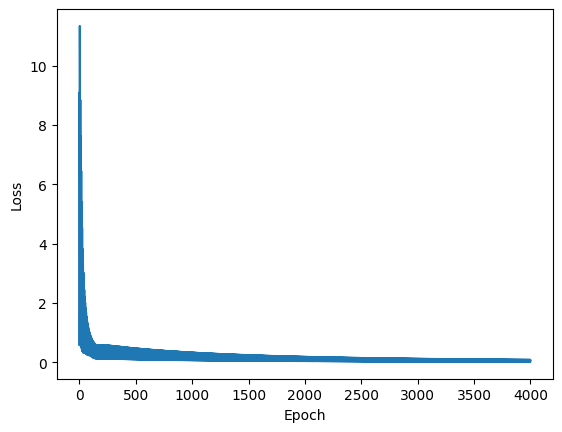

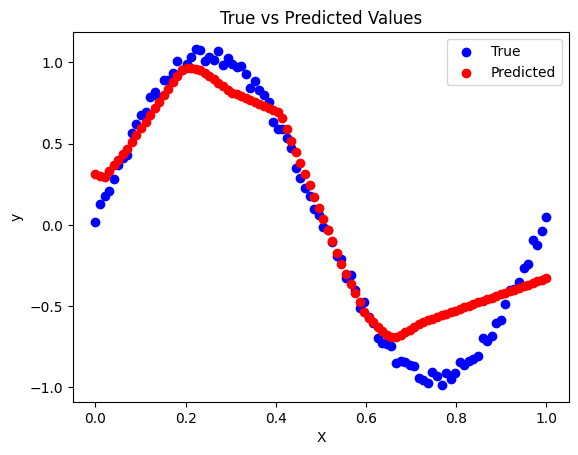

In [25]:
learning_rate = 0.001
batch_size = 30

epochs = 1000

layer_1 = Linear(X.size(1), 100)
activation_fn = ReLU()
layer_2 = Linear(100, y.size(1))
criterion = MSELoss()

losses = []

for epoch in range(epochs):
  for i in range(0, len(X), batch_size):
    X_batch = X[i:i+batch_size]
    y_batch = y[i:i+batch_size]
    # Прямой проход
    y_pred = layer_2.forward(activation_fn.forward(layer_1.forward(X_batch)))


    # Вычисление функции потерь
    loss = criterion.forward(y_pred, y_batch)
    loss.backward()
    # print(loss.item())
    losses.append(loss.item())

    with torch.no_grad():
    
      layer_1.weights -= learning_rate * layer_1.weights.grad
      layer_1.biases -= learning_rate * layer_1.biases.grad
      layer_2.weights -= learning_rate * layer_2.weights.grad
      layer_2.biases -= learning_rate * layer_2.biases.grad
    
    layer_1.weights.grad.zero_()
    layer_1.biases.grad.zero_()
    layer_2.weights.grad.zero_()
    layer_2.biases.grad.zero_()
  
  # predictions.append(torch.mean(y_pred).detach().numpy())
  # zero_() - inplace (меняет тензор градиента напрямую), zero() - out-of-place (возвращает новый обнуленный тензор, исхорный остается без изменений)
      

# График функции потерь
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Прогоняем входные данные через обученную модель
y_pred = layer_2.forward(activation_fn.forward(layer_1.forward(X)))
# print(y_pred.shape)

plt.scatter(X, y, color='blue', label='True')
plt.scatter(X, y_pred.detach(), color='red', label='Predicted')

plt.title('True vs Predicted Values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Отображаем график
plt.show()

<bound method Module.parameters of RegressionModel(
  (linear): Linear(in_features=1, out_features=1000, bias=True)
  (linear2): Linear(in_features=1000, out_features=1, bias=True)
)>


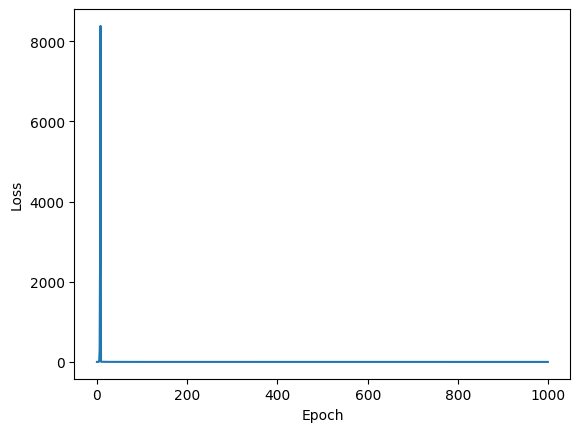

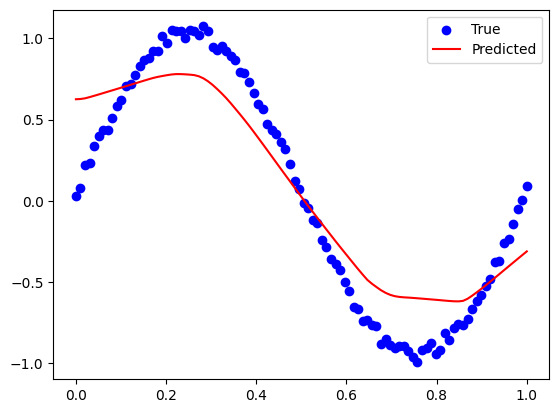

In [11]:
import torch
import matplotlib.pyplot as plt

# Создаем исходные данные
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

# Создаем модель
class RegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_size, hidden_size)
        self.relu = ReLU()
        self.linear2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu.forward(x)
        x = self.linear2(x)
        return x

# Инициализируем модель и функцию потерь
model = RegressionModel(1, 1000, 1)
print(model.parameters)
loss_fn = MSELoss()

# Инициализируем оптимизатор
learning_rate = 0.01

# # Параметры
# weight_1 = torch.nn.Parameter(torch.randn(1, 10))
# bias_1 = torch.nn.Parameter(torch.zeros(10))

# weight_2 = torch.nn.Parameter(torch.randn(10, 1))
# bias_2 = torch.nn.Parameter(torch.zeros(1))


optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Обучение модели
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # Сброс градиентов перед обратным распространением
    optimizer.zero_grad()

    # Вычисление предсказания модели и значения функции потерь
    y_pred = model(X)
    loss = loss_fn.forward(y_pred, y)

    # Расчет градиентов и обновление весов
    loss.backward()
    optimizer.step()

    # Сохранение значения функции потерь
    losses.append(loss.item())

# Вывод результатов
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Вывод исходных данных и предсказанных значений на одном графике
plt.scatter(X, y, color='blue', label="True")
plt.plot(X, model(X).detach().numpy(), color='red', label="Predicted")
plt.legend()
plt.show()

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [27]:
import torch.optim as optim

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

/tmp/ipykernel_4879/541419414.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)


epoch 0 mean loss 8738.536802101135
epoch 1 mean loss 6747.4717301130295
epoch 2 mean loss 4924.78057448566
epoch 3 mean loss 3953.690535608679
epoch 4 mean loss 3252.248394778818
epoch 5 mean loss 2733.0987448032342
epoch 6 mean loss 2361.9298613425362
epoch 7 mean loss 2071.2272372485036
epoch 8 mean loss 1843.7117291211991
epoch 9 mean loss 1660.4572170258232
epoch 10 mean loss 1509.8647632516047
epoch 11 mean loss 1384.2710071454994
epoch 12 mean loss 1277.90489316279
epoch 13 mean loss 1186.6744386197515
epoch 14 mean loss 1107.5938284173467
epoch 15 mean loss 1038.3865891518478
epoch 16 mean loss 977.3124500717554
epoch 17 mean loss 923.0243660150547
epoch 18 mean loss 874.4466620625093
epoch 19 mean loss 830.7253059848138
epoch 20 mean loss 791.1674912037637
epoch 21 mean loss 755.2055669608097
epoch 22 mean loss 722.3707789619003
epoch 23 mean loss 692.2720683838638
epoch 24 mean loss 664.5812368351791
epoch 25 mean loss 639.0204542079832
epoch 26 mean loss 615.3530369958991
ep

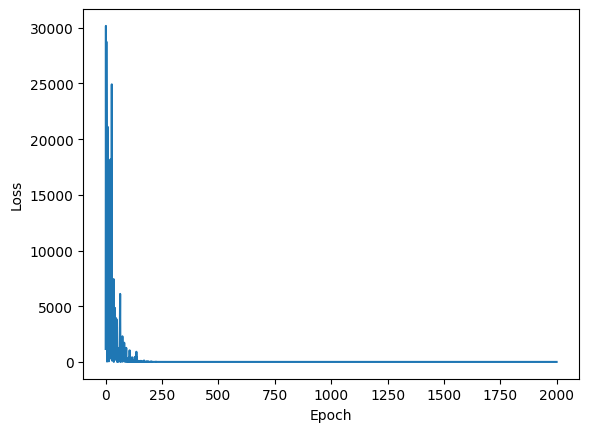

In [32]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

class SquaredLoss:
  def forward(self, y_pred, y_true):
    self.y_pred = torch.tensor(y_pred, requires_grad=True)
    self.z = (self.y_pred - y_true) ** 2
    return self.z

  def backward(self):
    self.z.backward()
    self.dinput =  self.y_pred.grad
    
class Neuron:
  def __init__(self, n_inputs):
    self.n_inputs = n_inputs
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)
  
  def forward(self, input):
    self.input = input
    return torch.dot(self.weights, input) + self.bias # скалярное произведение
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss) - по сути производная ошибки dE
    self.dweights = dvalue * self.input # df/dW
    self.dinput =  dvalue * self.weights # df/wX
    self.dbias = dvalue # df/db
  
import random

n_inputs = 4 # <размерность элемента выборки >
lr = 0.01 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

# оптимизатор
optimizer = optim.SGD(params=[neuron.weights, neuron.bias], lr=lr)

losses = []
# автоматическое обновление весов
for epoch in range(n_epoch):
  for x_example, y_example in random.sample(list(zip(X, y)), 20):
    optimizer.zero_grad() # обнуляем градиенты перед вычислением новых
    # forward pass
    y_pred = neuron.forward(x_example) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
    

    # backprop
    loss.backward()
    neuron.backward(loss.dinput)
    
    # градиентный спуск
    with torch.no_grad():
      neuron.weights -= lr * neuron.dweights
      neuron.bias -= lr * neuron.dbias
    optimizer.step()
    
    losses.append(curr_loss.item())
    
  print(f'epoch {epoch} mean loss {sum(losses) / len(losses)}')

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

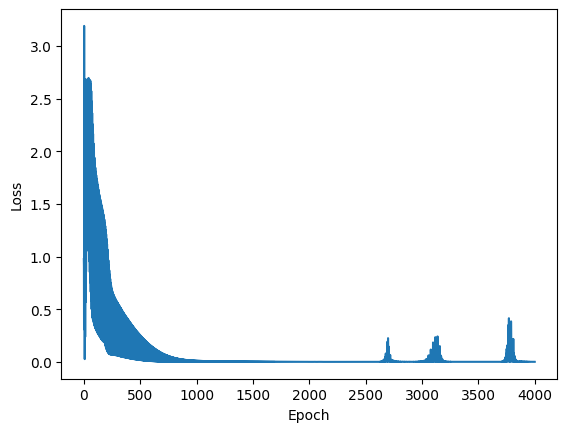

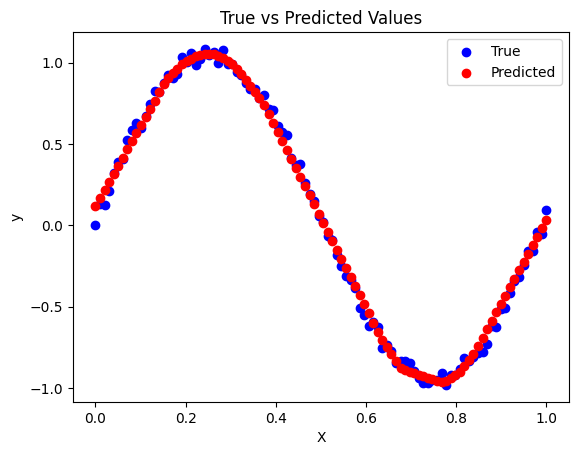

In [41]:
learning_rate = 0.01
batch_size = 30

epochs = 1000

layer_1 = Linear(X.size(1), 100)
activation_fn = ReLU()
layer_2 = Linear(100, y.size(1))
criterion = MSELoss()
optimizer = torch.optim.Adam(params=[layer_1.weights, layer_1.biases, layer_2.weights, layer_2.biases], lr=learning_rate)

losses = []

for epoch in range(epochs):
  for i in range(0, len(X), batch_size):
    X_batch = X[i:i+batch_size]
    y_batch = y[i:i+batch_size]
    # Прямой проход
    y_pred = layer_2.forward(activation_fn.forward(layer_1.forward(X_batch)))


    # Вычисление функции потерь
    loss = criterion.forward(y_pred, y_batch)
    loss.backward()
    # print(loss.item())
    losses.append(loss.item())

    
    

    with torch.no_grad():
    
      layer_1.weights -= learning_rate * layer_1.weights.grad
      layer_1.biases -= learning_rate * layer_1.biases.grad
      layer_2.weights -= learning_rate * layer_2.weights.grad
      layer_2.biases -= learning_rate * layer_2.biases.grad
    
    # layer_1.weights.grad.zero_()
    # layer_1.biases.grad.zero_()
    # layer_2.weights.grad.zero_()
    # layer_2.biases.grad.zero_()
    optimizer.step()
    optimizer.zero_grad()
  
  # predictions.append(torch.mean(y_pred).detach().numpy())
  # zero_() - inplace (меняет тензор градиента напрямую), zero() - out-of-place (возвращает новый обнуленный тензор, исхорный остается без изменений)
      

# График функции потерь
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Прогоняем входные данные через обученную модель
y_pred = layer_2.forward(activation_fn.forward(layer_1.forward(X)))
# print(y_pred.shape)

plt.scatter(X, y, color='blue', label='True')
plt.scatter(X, y_pred.detach(), color='red', label='Predicted')

plt.title('True vs Predicted Values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Отображаем график
plt.show()

<bound method Module.parameters of RegressionModel(
  (linear): Linear(in_features=1, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)>
[0.5992184281349182, 0.5051727294921875, 0.48607632517814636, 0.4392470121383667, 0.38365989923477173, 0.34302765130996704, 0.3184117376804352, 0.29599636793136597, 0.26850035786628723, 0.24173849821090698, 0.22406651079654694, 0.21623221039772034, 0.21148842573165894, 0.20529773831367493, 0.20032697916030884, 0.20083218812942505, 0.2054508626461029, 0.20853033661842346, 0.20777618885040283, 0.2059306651353836, 0.20543254911899567, 0.20496182143688202, 0.2020511031150818, 0.19698745012283325, 0.19223079085350037, 0.1890867054462433, 0.18651409447193146, 0.18322530388832092, 0.17969942092895508, 0.17733435332775116, 0.1763935685157776, 0.1756853461265564, 0.17441724240779877, 0.1730528622865677, 0.17222070693969727, 0.1716192215681076, 0.1705412119626999, 0.1689578890800476, 0.16751901805400848, 0.1664714664

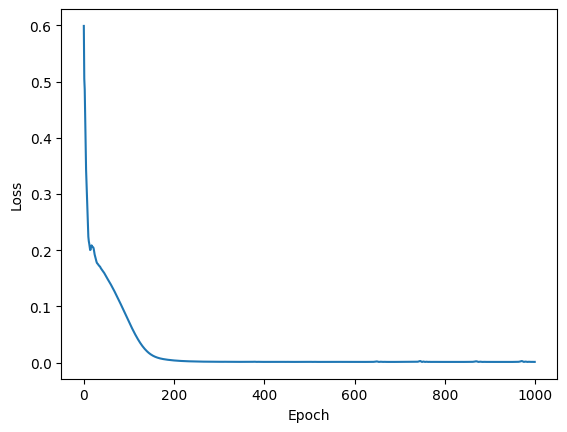

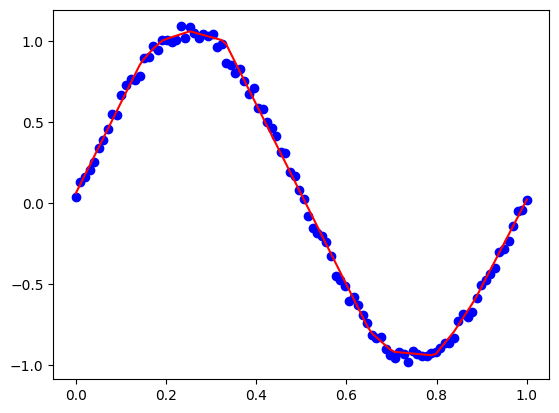

In [14]:
import torch
import matplotlib.pyplot as plt

# Создаем исходные данные
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

# Создаем модель
class RegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_size, hidden_size) # скрытый слой с 100 нейронами
        self.relu = ReLU()
        self.linear2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu.forward(x)
        x = self.linear2(x)
        return x

# Инициализируем модель и функцию потерь
model = RegressionModel(1, 100, 1)
print(model.parameters)
loss_fn = MSELoss()

# Инициализируем оптимизатор
learning_rate = 0.01

# # Параметры
# weight_1 = torch.nn.Parameter(torch.randn(1, 10))
# bias_1 = torch.nn.Parameter(torch.zeros(10))

# weight_2 = torch.nn.Parameter(torch.randn(10, 1))
# bias_2 = torch.nn.Parameter(torch.zeros(1))


optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Обучение модели
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # Сброс градиентов перед обратным распространением
    optimizer.zero_grad()

    # Вычисление предсказания модели и значения функции потерь
    y_pred = model(X)
    loss = loss_fn.forward(y_pred, y)

    # Расчет градиентов и обновление весов
    loss.backward()
    optimizer.step()

    # Сохранение значения функции потерь
    losses.append(loss.item())

# Вывод результатов
print(losses)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Вывод исходных данных и предсказанных значений на одном графике
plt.scatter(X, y, color='blue')
# print(f"detach: {model(X).detach().numpy()}")
plt.plot(X, model(X).detach().numpy(), color='red')
plt.show()

## 3.3 Построение сетей при помощи `torch.nn`

In [43]:
import torch.nn as nn

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [44]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.4 * torch.rand(X.size()) 

In [45]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons_1, n_hidden_neurons_2):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons_1)
        # поэкспериментировать с другиями функциями активации
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons_2, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

sine_net = SineNet(10, 10)

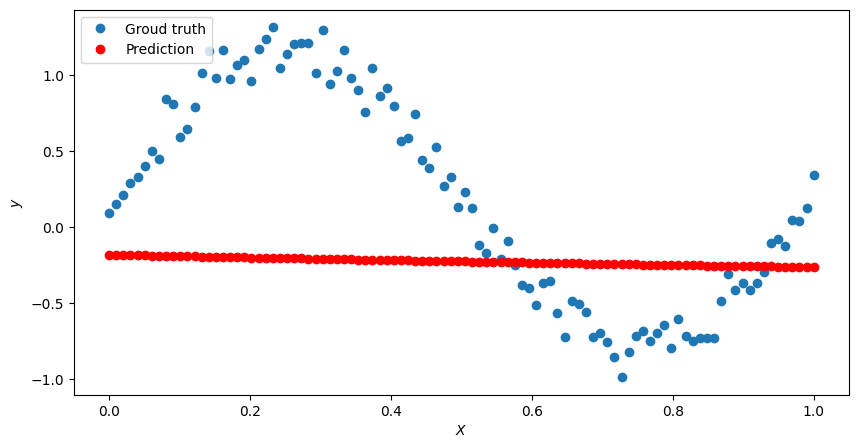

In [46]:
import matplotlib.pyplot as plt

def predict(net, X, y):
    y_pred = net.forward(X)

    plt.figure(figsize=(10, 5))
    plt.plot(X.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(X.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$X$')
    plt.ylabel('$y$')

predict(sine_net, X, y)

In [47]:
optimizer = torch.optim.Adam(params=sine_net.parameters(), lr=0.01)
criterion = torch.nn.MSELoss(reduction="sum")

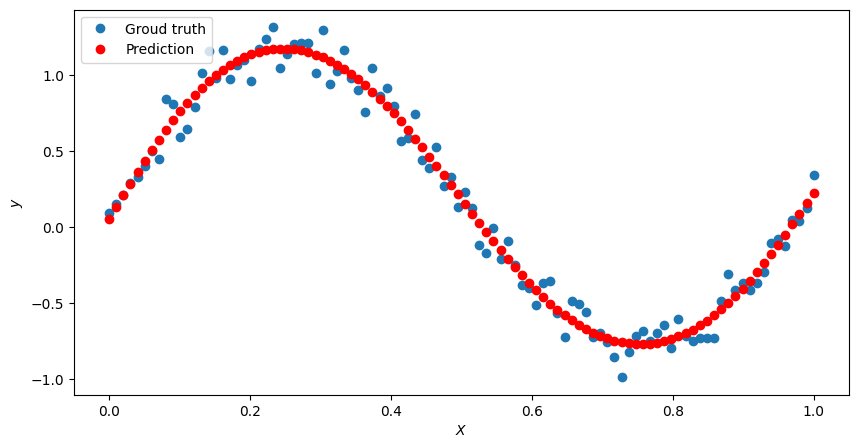

In [48]:
for epoch in range(1000):
    optimizer.zero_grad()

    y_pred =  sine_net.forward(X)
    loss_val = criterion.forward(y_pred, y)

    loss_val.backward()

    optimizer.step()

predict(sine_net, X, y)

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

Epoch 0: loss = 0.5269542336463928
Epoch 100: loss = 0.1830974817276001
Epoch 200: loss = 0.06314593553543091
Epoch 300: loss = 0.02046688087284565
Epoch 400: loss = 0.014795427210628986
Epoch 500: loss = 0.012256131507456303
Epoch 600: loss = 0.011854656040668488
Epoch 700: loss = 0.012124738655984402
Epoch 800: loss = 0.01173415221273899
Epoch 900: loss = 0.011877227574586868


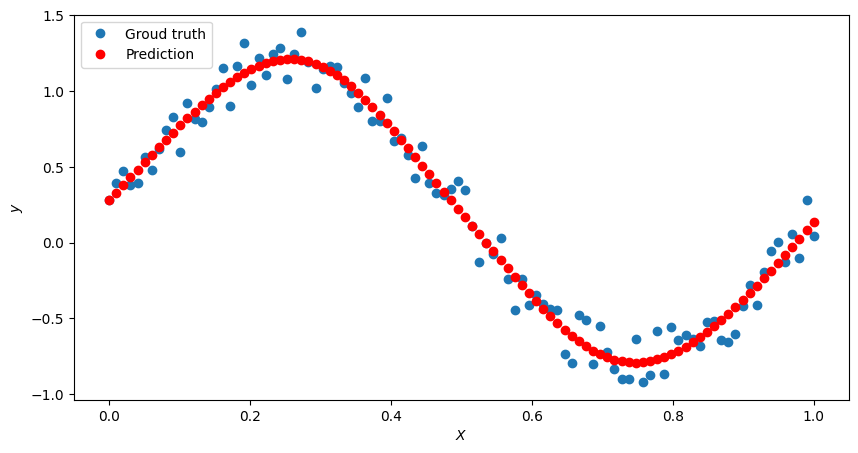

In [50]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

model = nn.Sequential(
    nn.Linear(1, 10),  # Полносвязный слой с 1 входом и 10 выходами
    nn.Sigmoid(),  # Функция активации
    nn.Linear(10, 1)  # Полносвязный слой с 10 входами и 1 выходом
)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Обучаем модель
for epoch in range(1000):
    optimizer.zero_grad()
    
    y_pred = model(X)
    
    loss = loss_fn(y_pred, y)

    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {}: loss = {}'.format(epoch, loss.item()))
        

# Выводим предсказанные значения
predict(model, X, y)

## 3.4. Datasets and dataloaders

In [51]:
from torch.utils.data import Dataset, DataLoader

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2. 

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [54]:
class SinDataset(Dataset):
    def __init__(self):
        self.X = torch.linspace(0, 1, 100).view(-1, 1)
        self.y = torch.sin(2 * np.pi * self.X) + 0.1 * torch.rand(self.X.size())

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]\
          
dataset = SinDataset()
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

for inputs, target in dataloader:
    print(inputs, target)

tensor([[0.9697],
        [0.2424],
        [0.8182],
        [0.5758],
        [0.4444],
        [0.5051],
        [0.3535],
        [0.5556],
        [0.4646],
        [0.1414]]) tensor([[-0.1088],
        [ 1.0027],
        [-0.8677],
        [-0.3928],
        [ 0.3649],
        [ 0.0111],
        [ 0.8660],
        [-0.3222],
        [ 0.3029],
        [ 0.8086]])
tensor([[0.9899],
        [0.5859],
        [0.9394],
        [0.4747],
        [0.4343],
        [0.9293],
        [0.9798],
        [0.3434],
        [0.1313],
        [0.1616]]) tensor([[-0.0028],
        [-0.4544],
        [-0.2832],
        [ 0.1943],
        [ 0.4583],
        [-0.3570],
        [-0.1214],
        [ 0.8571],
        [ 0.7598],
        [ 0.8846]])
tensor([[0.2727],
        [0.1010],
        [0.5455],
        [0.7475],
        [0.1515],
        [0.8081],
        [0.5152],
        [0.6364],
        [0.1919],
        [0.7980]]) tensor([[ 0.9990],
        [ 0.6295],
        [-0.2564],
        [-0.9396],

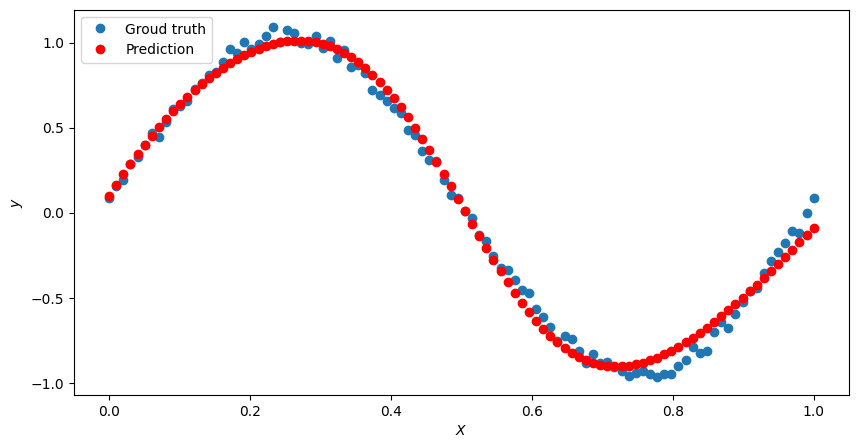

In [59]:
model = nn.Sequential(
    nn.Linear(1, 10),  # Полносвязный слой с 1 входом и 10 выходами
    nn.Sigmoid(),  # Функция активации
    nn.Linear(10, 1)  # Полносвязный слой с 10 входами и 1 выходом
)
loss_fn = nn.MSELoss()
num_epochs = 1000
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()

        y_pred = model(batch_x)
        loss = loss_fn(y_pred, batch_y)

        loss.backward()
        optimizer.step()
        
predict(model, dataset.X, dataset.y)


3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv. 

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`). 

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке. 


In [250]:
import pandas as pd

class DiamondsDataset(Dataset):
    def __init__(self, data_path):
        df = pd.read_csv(data_path, index_col=0)
        # удаление столбцов с нечисловыми данными
        df = df.select_dtypes(include=['float64', 'int64'])
        # установка целевого столбца
        self.y = torch.tensor(df['price'].values)
        # удаление целевого столбца из датафрейма
        df = df.drop(columns=['price'])
        # преобразование данных в тензоры
        self.X = torch.tensor(df.values)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.X[index].float(), self.y[index].float()

In [251]:
from torch.utils.data import random_split

dataset = DiamondsDataset('data/diamonds.csv')
train_dataset, test_dataset = random_split(dataset, [int(len(dataset)*0.8),
                                                     len(dataset)-int(len(dataset)*0.8)])

In [252]:
print(dataset.X[:1])

tensor([[ 0.2300, 61.5000, 55.0000,  3.9500,  3.9800,  2.4300]],
       dtype=torch.float64)


/home/noble6/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/noble6/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([144])) that is different to the input size (torch.Size([144, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 30531352.72189349
Epoch 1, Loss: 25466976.970414203
Epoch 2, Loss: 19414335.431952663
Epoch 3, Loss: 16532233.73372781
Epoch 4, Loss: 15976241.556213018
Epoch 5, Loss: 15943252.437869823
Epoch 6, Loss: 15950942.615384616
Epoch 7, Loss: 15943919.431952663
Epoch 8, Loss: 15949156.650887573
Epoch 9, Loss: 15949371.881656805
Epoch 10, Loss: 15952715.307692308
Epoch 11, Loss: 15949566.556213018
Epoch 12, Loss: 15948091.715976331
Epoch 13, Loss: 15951983.301775148
Epoch 14, Loss: 15953985.088757396
Epoch 15, Loss: 15949233.73372781
Epoch 16, Loss: 15948915.656804733
Epoch 17, Loss: 15947060.692307692
Epoch 18, Loss: 15938585.887573965
Epoch 19, Loss: 15959418.828402366


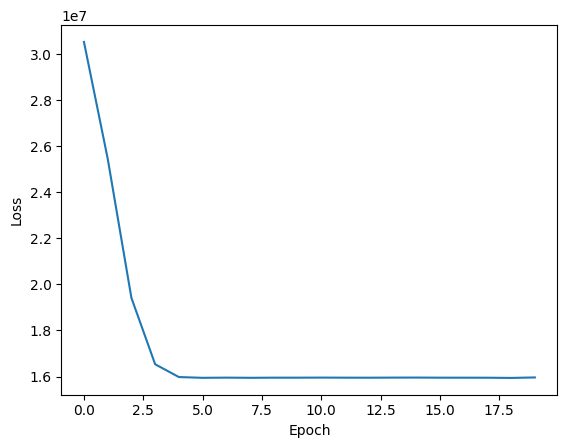

In [253]:
# определение модели
model = nn.Sequential(
    # nn.BatchNorm1d(6),
    nn.Linear(6, 128),
    nn.LayerNorm(128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.LayerNorm(64),
    nn.ReLU(),
    nn.Linear(64, 1)
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

losses = []
num_epochs = 20
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, target in train_loader:
        inputs = inputs.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    epoch_loss = running_loss/len(train_loader)
    losses.append(epoch_loss)
    print(f"Epoch {epoch}, Loss: {epoch_loss}")

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [254]:
class DiamondsDataset(Dataset):
    def __init__(self, data_path, transform=None):
        df = pd.read_csv(data_path, index_col=0)
        self.y = df['price']
        df = df.drop('price', axis=1)
        self.X = df
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        sample = self.X.iloc[index], self.y.iloc[index]
        # print(sample)
        if self.transform:
            sample = self.transform(sample)
        return sample

In [255]:
class DropColsTransform:
    def __init__(self, drop):
        self.drop = drop

    def __call__(self, sample):
        X, y = sample
        X = X.drop(X.index[self.drop], axis=0)
        return X, y

In [256]:
class ToTensorTransform:
    def __call__(self, sample):
        X, y = sample
        X = torch.tensor(X.astype('float64').values).float()
        y = torch.tensor(y).float()
        return X, y

In [257]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset("data/diamonds.csv", transforms.Compose([drop, to_tensor]))


In [258]:
train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

train_dataset = DataLoader(train, batch_size=256)
test_dataset = DataLoader(test, batch_size=256)

In [259]:
# определение модели
model = nn.Sequential(
    # nn.BatchNorm1d(6),
    nn.Linear(6, 128),
    nn.LayerNorm(128),
    nn.ReLU(),
    nn.Linear(128, 1)
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

losses = []
num_epochs = 20
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, target in train_dataset:
        inputs = inputs.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    epoch_loss = running_loss/len(train_loader)
    losses.append(epoch_loss)
    print(f"Epoch {epoch}, Loss: {epoch_loss}")

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

/home/noble6/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/noble6/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([144])) that is different to the input size (torch.Size([144, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 29708147.171597634
Epoch 1, Loss: 21874048.02366864
Epoch 2, Loss: 16660171.378698224
Epoch 3, Loss: 16016355.627218936
Epoch 4, Loss: 16007584.946745561
Epoch 5, Loss: 16007942.674556212
Epoch 6, Loss: 16007985.136094674
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4879/2411025133.py", line 22, in <module>
    for inputs, target in train_dataset:
  File "/home/noble6/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 628, in __next__
  File "/home/noble6/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 671, in _next_data
    self._dataset, self._world_size, self._rank, sharding_group=SHARDING_PRIORITIES.DISTRIBUTED)
  File "/home/noble6/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 58, in fetch
  File "/home/noble6/.local/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 58, in <listcomp>
  File "/home/noble6/.local/lib/python3.10/site-packages/torch/utils/data/dataset.py", line 295, in __getitem__
    def __getitem__(self, idx):
  File 